In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd
from sklearn import datasets
import numpy as np
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path1='/content/drive/MyDrive/train.csv'
features = ['battery_power','bluetooth','clock_speed','dual_sim','front camera','4G','memory','depth','weight','n_cores',
            'camera','pixel height','pixel width','ram','height','width','3G','wifi']
target= ['price_range']            
#train = pd.read_csv(path1, header= None, encoding='utf-8')
train = pd.read_csv(path1,header=None,names=features + ['target'])
train= train.drop([0],axis=0)
display(train)

,battery_power,bluetooth,clock_speed,dual_sim,front camera,4G,memory,depth,weight,n_cores,camera,pixel height,pixel width,ram,height,width,3G,wifi,target
1,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,1,0,2
5,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,1,0,0
1997,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,1,1,2
1998,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,1,0,3
1999,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,1,1,0


In [6]:
#Informations Summary
train.describe().T

,count,unique,top,freq
battery_power,2000,1094,1872,6
bluetooth,2000,2,0,1010
clock_speed,2000,26,0.5,413
dual_sim,2000,2,1,1019
front camera,2000,20,0,474
4G,2000,2,1,1043
memory,2000,63,27,47
depth,2000,10,0.1,320
weight,2000,121,182,28
n_cores,2000,8,4,274


<Axes: >

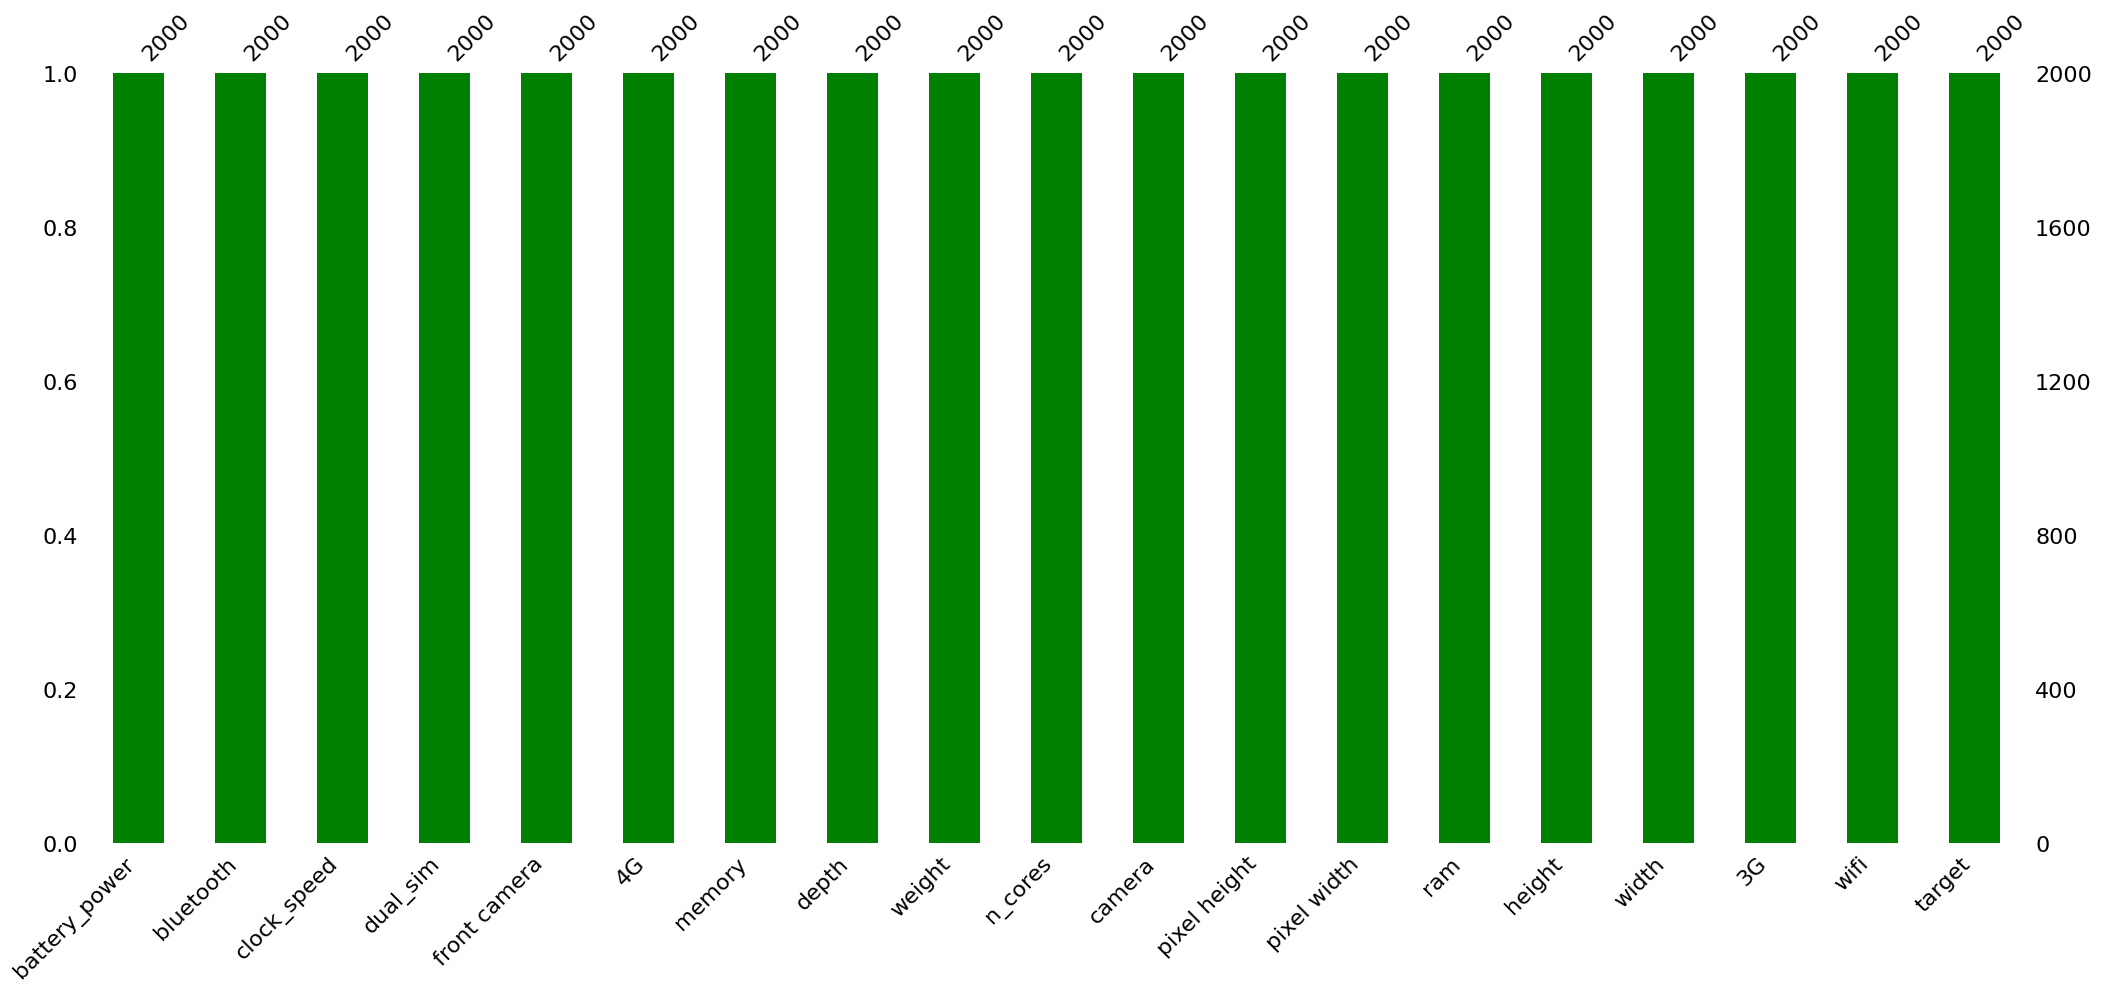

In [7]:
#Checking any missing data
msno.bar(train, color = "green")

In [8]:
X = train.iloc[0:,0:-1].values
X=X.astype('float64')
print(X)
y = train.iloc[0:,-1].values
y=y.astype('int64')
print (y)
print('Class labels:', np.unique(y))

[[8.420e+02 0.000e+00 2.200e+00 ... 7.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 3.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 2.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+01 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 4.000e+00 1.000e+00 1.000e+00]]
[1 2 2 ... 3 0 3]
Class labels: [0 1 2 3]


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier

In [15]:
def metrics_calculator(clf, X_valid, y_valid, model_name):
    y_pred = clf.predict(X_test_std)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [16]:
def model_evaluation(clf, X_train_std, X_test_std, y_train, y_test, model_name):
    y_pred_train = clf.predict(X_train_std)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))
    y_pred_test = clf.predict(X_test_std)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    result = metrics_calculator(clf, X_test_std, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=12)
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')
              
    ConfusionMatrixDisplay.from_estimator(clf, X_test_std, y_test, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')                                     
    ax2.grid(False)
    plt.tight_layout()
    plt.show() 

In [19]:
#Claasifier 1: Random Forest
#Training of model
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(X_train_std, y_train)
predictions_forest = forest_model.predict(X_test_std)
pred_prob = forest_model.predict_proba(X_test_std)
as_forest = accuracy_score(y_test, predictions_forest)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       407
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        97
           1       0.84      0.83      0.84       109
           2       0.80      0.81      0.80        93
           3       0.93      0.90      0.91       101

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87 

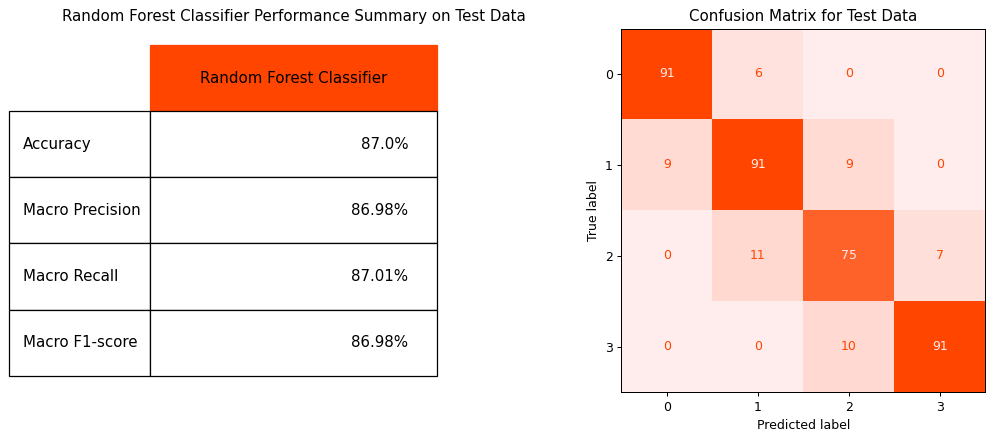

In [20]:
model_evaluation(forest_model, X_train_std, X_test_std, y_train, y_test, 'Random Forest Classifier')

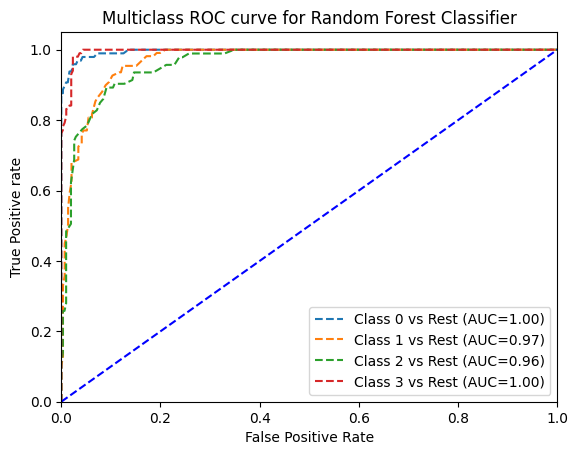

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4;

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='Class %s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [22]:
M1='%d' %(y_test != predictions_forest).sum()
print('Misclassified examples:')
print(M1)

Misclassified examples:
52


In [23]:
#Claasifier 1: XGBoost
#Training of model
model_xgboost = XGBClassifier(n_estimators=100, random_state=0, learning_rate=0.05)
model_xgboost.fit(X_train_std, y_train)
predictions_xgboost = model_xgboost.predict(X_test_std)
pred_prob = model_xgboost.predict_proba(X_test_std)
as_xgboost = accuracy_score(y_test, predictions_xgboost)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       407
           3       1.00      1.00      1.00       399

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        97
           1       0.84      0.87      0.86       109
           2       0.86      0.86      0.86        93
           3       0.97      0.93      0.95       101

    accuracy                           0.90       400
   macro avg       0.90      0.89      0.90 

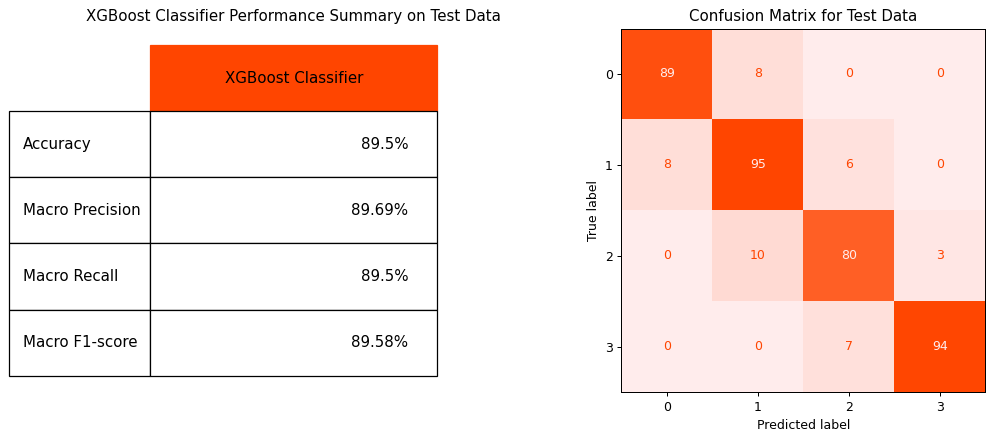

In [24]:
model_evaluation(model_xgboost, X_train_std, X_test_std, y_train, y_test, 'XGBoost Classifier')

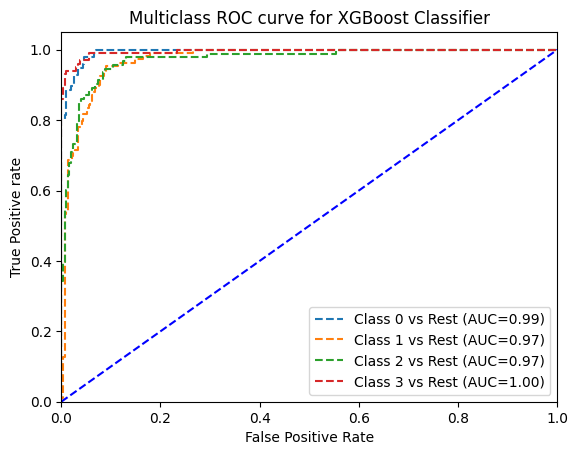

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4;

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='Class %s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [26]:
M2='%d' %(y_test != predictions_xgboost).sum()
print('Misclassified examples:')
print(M2)

Misclassified examples:
42


In [27]:
#Claasifier 1: KNN
#Training of model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_std, y_train)
predictions_knn = model_knn.predict(X_test_std)
pred_prob = model_knn.predict_proba(X_test_std)
as_knn = accuracy_score(y_test, predictions_knn)
print(as_knn)

0.4575



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       403
           1       0.58      0.65      0.62       391
           2       0.76      0.64      0.69       407
           3       0.92      0.74      0.82       399

    accuracy                           0.73      1600
   macro avg       0.75      0.73      0.73      1600
weighted avg       0.75      0.73      0.73      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.62      0.55        97
           1       0.29      0.35      0.32       109
           2       0.34      0.29      0.31        93
           3       0.84      0.57      0.68       101

    accuracy                           0.46       400
   macro avg       0.49      0.46      0.47 

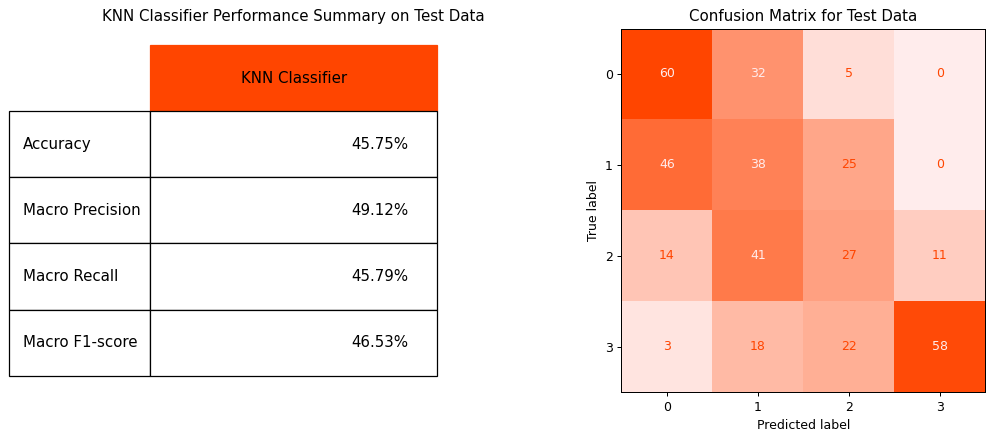

In [28]:
model_evaluation(model_knn, X_train_std, X_test_std, y_train, y_test, 'KNN Classifier')

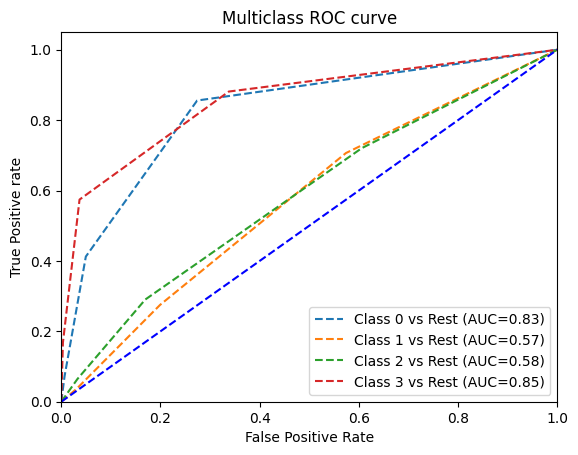

In [29]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4;

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='Class %s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [30]:
M3='%d' %(y_test != predictions_knn).sum()
print('Misclassified examples:')
print(M3)

Misclassified examples:
217


[0 1 2]
[0.2, 1.2, 2.2]
[0.4, 1.4, 2.4]


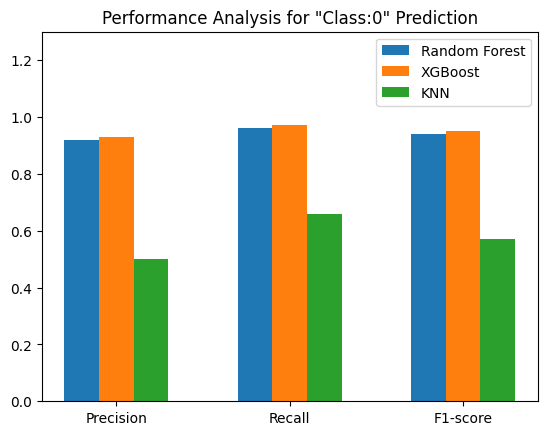

In [31]:
models = ["Random Forest","XGBoost","KNN"]
performance=["Precision", "Recall", "F1-score"]
RF=[0.92,	0.96,	0.94]
XG=[0.93,	0.97,	0.95]
KNN=[0.50,	0.66,	0.57]
w=0.2
rfbar=np.arange(len(models))
print(rfbar)
xgbar= [i+w for i in rfbar]
print(xgbar)
knnbar= [i+2*w for i in rfbar]
print(knnbar)
plt.bar(rfbar,RF,width=w,label="Random Forest")
plt.bar(xgbar,XG,width=w,label="XGBoost")
plt.bar(knnbar,KNN,width=w,label="KNN")

plt.ylim([0,1.3])
plt.title('Performance Analysis for "Class:0" Prediction')
#plt.xlabel('ML Models')
plt.xticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='upper right')
plt.show()

#df = pd.DataFrame({"ML Model":models,
                   #"Accuracy score":accuracy_scores})
#df.plot(x="ML Model",y="Accuracy score", figsize=(16,6),kind="bar",
        #title="Performance Visualization of Different Models",colormap="Set1")


[0 1 2]
[0.2, 1.2, 2.2]
[0.4, 1.4, 2.4]


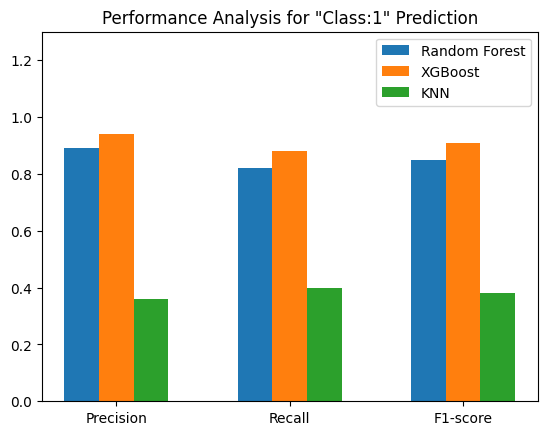

In [32]:
models = ["Random Forest","XGBoost","KNN"]
performance=["Precision", "Recall", "F1-score"]
RF=[0.89,	0.82,	0.85]
XG=[0.94,	0.88,	0.91]
KNN=[0.36,	0.40,	0.38]
w=0.2
rfbar=np.arange(len(models))
print(rfbar)
xgbar= [i+w for i in rfbar]
print(xgbar)
knnbar= [i+2*w for i in rfbar]
print(knnbar)
plt.bar(rfbar,RF,width=w,label="Random Forest")
plt.bar(xgbar,XG,width=w,label="XGBoost")
plt.bar(knnbar,KNN,width=w,label="KNN")

plt.ylim([0,1.3])
plt.title('Performance Analysis for "Class:1" Prediction')
#plt.xlabel('ML Models')
plt.xticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='upper right')
plt.show()


[0 1 2]
[0.2, 1.2, 2.2]
[0.4, 1.4, 2.4]


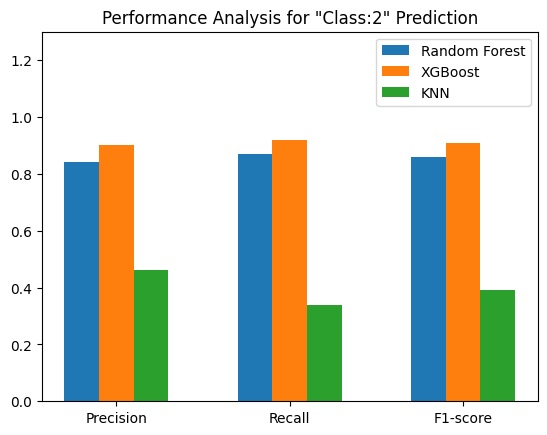

In [33]:
models = ["Random Forest","XGBoost","KNN"]
performance=["Precision", "Recall", "F1-score"]
RF=[0.84,	0.87,	0.86]
XG=[0.90,	0.92,	0.91]
KNN=[0.46,	0.34,	0.39]
w=0.2
rfbar=np.arange(len(models))
print(rfbar)
xgbar= [i+w for i in rfbar]
print(xgbar)
knnbar= [i+2*w for i in rfbar]
print(knnbar)
plt.bar(rfbar,RF,width=w,label="Random Forest")
plt.bar(xgbar,XG,width=w,label="XGBoost")
plt.bar(knnbar,KNN,width=w,label="KNN")

plt.ylim([0,1.3])
plt.title('Performance Analysis for "Class:2" Prediction')
#plt.xlabel('ML Models')
plt.xticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='upper right')
plt.show()


[0 1 2]
[0.2, 1.2, 2.2]
[0.4, 1.4, 2.4]


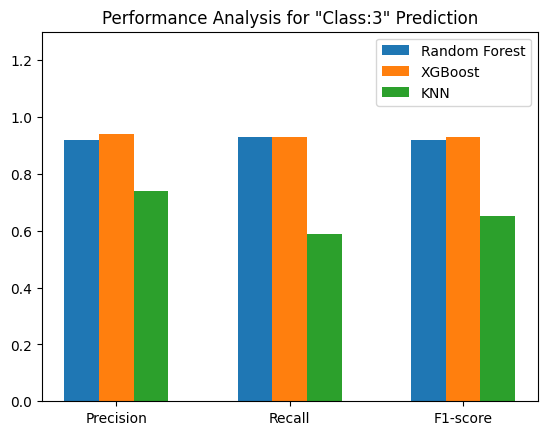

In [34]:
models = ["Random Forest","XGBoost","KNN"]
performance=["Precision", "Recall", "F1-score"]
RF=[0.92,	0.93,	0.92]
XG=[0.94,	0.93,	0.93]
KNN=[0.74,	0.59,	0.65]
w=0.2
rfbar=np.arange(len(models))
print(rfbar)
xgbar= [i+w for i in rfbar]
print(xgbar)
knnbar= [i+2*w for i in rfbar]
print(knnbar)
plt.bar(rfbar,RF,width=w,label="Random Forest")
plt.bar(xgbar,XG,width=w,label="XGBoost")
plt.bar(knnbar,KNN,width=w,label="KNN")

plt.ylim([0,1.3])
plt.title('Performance Analysis for "Class:3" Prediction')
#plt.xlabel('ML Models')
plt.xticks(xgbar,performance)
#plt.ylabel('True Positive rate')
plt.legend(loc='upper right')
plt.show()


[0 1]
[0.2, 1.2]
[0.4, 1.4]


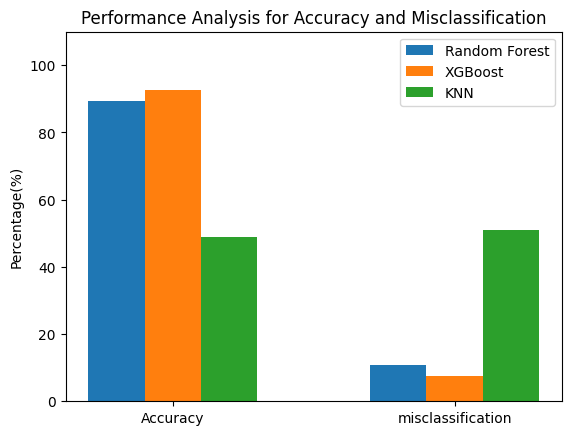

In [35]:
models = ["Random Forest","XGBoost","KNN"]
performance=["Accuracy", "misclassification"]
RF=[89.25,10.75]
XG=[92.50,7.50]
KNN=[49.00,51.00]
w=0.2
rfbar=np.arange(len(performance))
print(rfbar)
xgbar= [i+w for i in rfbar]
print(xgbar)
knnbar= [i+2*w for i in rfbar]
print(knnbar)
plt.bar(rfbar,RF,width=w,label="Random Forest")
plt.bar(xgbar,XG,width=w,label="XGBoost")
plt.bar(knnbar,KNN,width=w,label="KNN")

plt.ylim([0,110])
plt.title('Performance Analysis for Accuracy and Misclassification')
#plt.xlabel('ML Models')
plt.xticks(xgbar,performance)
plt.ylabel('Percentage(%)')
plt.legend(loc='upper right')
plt.show()
